In [2]:
#Uncomment and Run if the first time
#!pip install -r requirements.txt

Defaulting to user installation because normal site-packages is not writeable
   ---------------------------------------- 0.0/294.9 kB ? eta -:--:--
   ---- ----------------------------------- 30.7/294.9 kB 1.4 MB/s eta 0:00:01
   -------- ------------------------------ 61.4/294.9 kB 825.8 kB/s eta 0:00:01
   ------------------- -------------------- 143.4/294.9 kB 1.1 MB/s eta 0:00:01
   -------------------------- ------------- 194.6/294.9 kB 1.2 MB/s eta 0:00:01
   -------------------------------------- - 286.7/294.9 kB 1.4 MB/s eta 0:00:01
   ---------------------------------------- 294.9/294.9 kB 1.2 MB/s eta 0:00:00
   ---------------------------------------- 0.0/99.8 MB ? eta -:--:--
   ---------------------------------------- 0.1/99.8 MB 4.2 MB/s eta 0:00:24
   ---------------------------------------- 0.3/99.8 MB 3.5 MB/s eta 0:00:29
   ---------------------------------------- 0.6/99.8 MB 3.5 MB/s eta 0:00:29
   ---------------------------------------- 0.8/99.8 MB 3.5 MB/s eta 0:

In [3]:
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot
from tensorflow.keras import Model
from tensorflow.keras import Sequential
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Conv2D, Input, Dropout, Activation, Dense, MaxPooling2D, Flatten, GlobalAveragePooling2D
from tensorflow.keras.optimizers import Adadelta, Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Dense
import sklearn
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix
import warnings
import time
warnings.filterwarnings('ignore')

## Load dataset

In [4]:
filepath = "data/iot23_combined.csv"
df = pd.read_csv(filepath)

In [5]:
df.replace({False: 0, True: 1}, inplace=True)
df.replace({'False': 0, 'True': 1}, inplace=True)

In [6]:
df = df.dropna()

In [7]:
df

,Unnamed: 0,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,label,...,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SH,conn_state_SHR
0,0,2.998796,0,0,0.0,3.0,180.0,0.0,0.0,PartOfAHorizontalPortScan,...,0,0,0,1,0,0,0,0,0,0.0
1,1,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan,...,0,0,0,1,0,0,0,0,0,0.0
2,2,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,PartOfAHorizontalPortScan,...,0,0,0,1,0,0,0,0,0,0.0
3,3,2.998804,0,0,0.0,3.0,180.0,0.0,0.0,Benign,...,0,0,0,1,0,0,0,0,0,0.0
4,4,0.000000,0,0,0.0,1.0,60.0,0.0,0.0,Benign,...,0,0,0,1,0,0,0,0,0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
636310,6685,0.000000,0,0,0.0,1.0,40.0,0.0,0.0,PartOfAHorizontalPortScan,...,0,0,0,1,0,0,0,0,0,0.0
636311,6686,0.000000,0,0,0.0,1.0,40.0,0.0,0.0,PartOfAHorizontalPortScan,...,0,0,0,1,0,0,0,0,0,0.0
636312,6687,0.000000,0,0,0.0,1.0,40.0,0.0,0.0,PartOfAHorizontalPortScan,...,0,0,0,1,0,0,0,0,0,0.0
636313,6688,0.000000,0,0,0.0,1.0,40.0,0.0,0.0,PartOfAHorizontalPortScan,...,0,0,0,1,0,0,0,0,0,0.0


In [8]:
df.describe()

,Unnamed: 0,duration,orig_bytes,resp_bytes,missed_bytes,orig_pkts,orig_ip_bytes,resp_pkts,resp_ip_bytes,proto_icmp,...,conn_state_RSTO,conn_state_RSTOS0,conn_state_RSTR,conn_state_RSTRH,conn_state_S0,conn_state_S1,conn_state_S2,conn_state_S3,conn_state_SF,conn_state_SHR
count,636315.000000,636315.000000,6.363150e+05,6.363150e+05,636315.000000,636315.000000,6.363150e+05,636315.000000,6.363150e+05,636315.000000,...,636315.000000,636315.000000,636315.000000,636315.000000,636315.000000,636315.000000,636315.000000,636315.000000,636315.000000,636315.000000
mean,47617.554576,1.002054,1.280451e+02,3.598637e+01,0.132958,1.907909,2.216029e+02,0.250638,4.780504e+01,0.005379,...,0.000214,0.000035,0.000545,0.000008,0.947644,0.000072,0.000038,0.002489,0.017548,0.000002
std,29702.027644,122.449261,9.477827e+04,1.463941e+04,23.648299,40.134193,9.543589e+04,23.246132,1.518818e+04,0.073147,...,0.014618,0.005880,0.023346,0.002803,0.222744,0.008502,0.006141,0.049831,0.131301,0.001254
min,0.000000,-1.000000,-1.000000e+00,-1.000000e+00,0.000000,0.000000,0.000000e+00,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20842.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,4.000000e+01,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,46972.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,1.000000,6.000000e+01,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,73485.000000,0.000000,0.000000e+00,0.000000e+00,0.000000,2.000000,8.000000e+01,0.000000,0.000000e+00,0.000000,...,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,99998.000000,48976.819063,7.554662e+07,1.166102e+07,5792.000000,18444.000000,7.606306e+07,9307.000000,1.207699e+07,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


## Explore Dataset Analysis

In [9]:
del df['Unnamed: 0']

In [10]:
# Step 1: Check for duplicated rows
duplicates = df.duplicated()

# Step 2: Count the occurrences of duplicates
duplicate_counts = duplicates.sum()
print("Number of duplicated rows:", duplicate_counts)

Number of duplicated rows: 594085


In [11]:
# Step 3: Remove duplicated rows
df = df.drop_duplicates()

# Step 4: Verify that duplicates have been removed
duplicates_after_removal = df.duplicated().sum()
print("Number of duplicated rows after removal:", duplicates_after_removal)

Number of duplicated rows after removal: 0


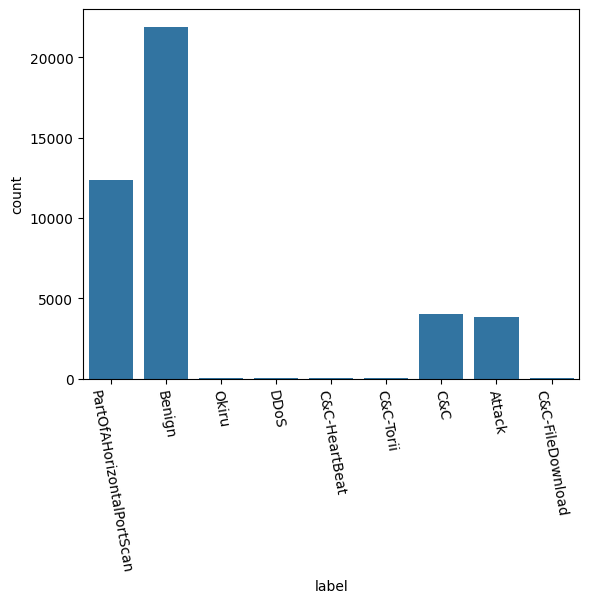

In [12]:
sns.countplot(x='label', data=df)
plt.xticks(rotation=-80)
plt.show()

Here's a brief explanation of each label

- **PartOfAHorizontalPortScan:** A large number of connection attempts to various ports across multiple hosts, typically to discover open ports and vulnerable services. This activity is a common precursor to more targeted attacks.

- **Okiru:** Associated with the Okiru malware, which targets IoT devices. Okiru is known for its capability to infect routers and other connected devices.
- **Benign:** Normal, non-malicious network traffic that does not pose a security threat. This label is crucial for training models to distinguish between harmful and harmless activities.
- **DDoS (Distributed Denial of Service):** Traffic patterns indicative of a DDoS attack, where multiple systems flood the bandwidth or resources of a targeted system, usually one or more web servers.
- **C&C (Command and Control):** Traffic associated with command and control servers, which attackers use to communicate with and control compromised systems within a botnet or malware-infected network.
- **C&C-HeartBeat:** A specific type of C&C traffic that involves periodic signals (heartbeats) sent from compromised devices to a C&C server to indicate the device is still active and connected.
- **Attack:** A general label for traffic that is part of a network attack, which could involve unauthorized access, data exfiltration, or other malicious activities.
- **C&C-FileDownload:** Traffic indicating that a compromised device is downloading files from a C&C server, potentially indicating the download of malware, updates to existing malware, or malicious configurations.
- **C&C-Torii:** Activity related to the Torii botnet, which is known for its sophisticated design and versatility in targeting various platforms and devices.

## Remove illogical data

In [13]:
df.duration.unique()

array([2.998796, 0.      , 2.998804, ..., 9.092066, 9.007351, 0.012241])

Negative values on duration colums is illogical data so we will not use it.

In [14]:
df[(df['duration'] < 0)].shape[0]

17

In [15]:
df = df[(df['duration'] >= 0)]
df[(df['duration'] < 0)].shape[0]

0

### Correlation table heatmap

<Axes: >

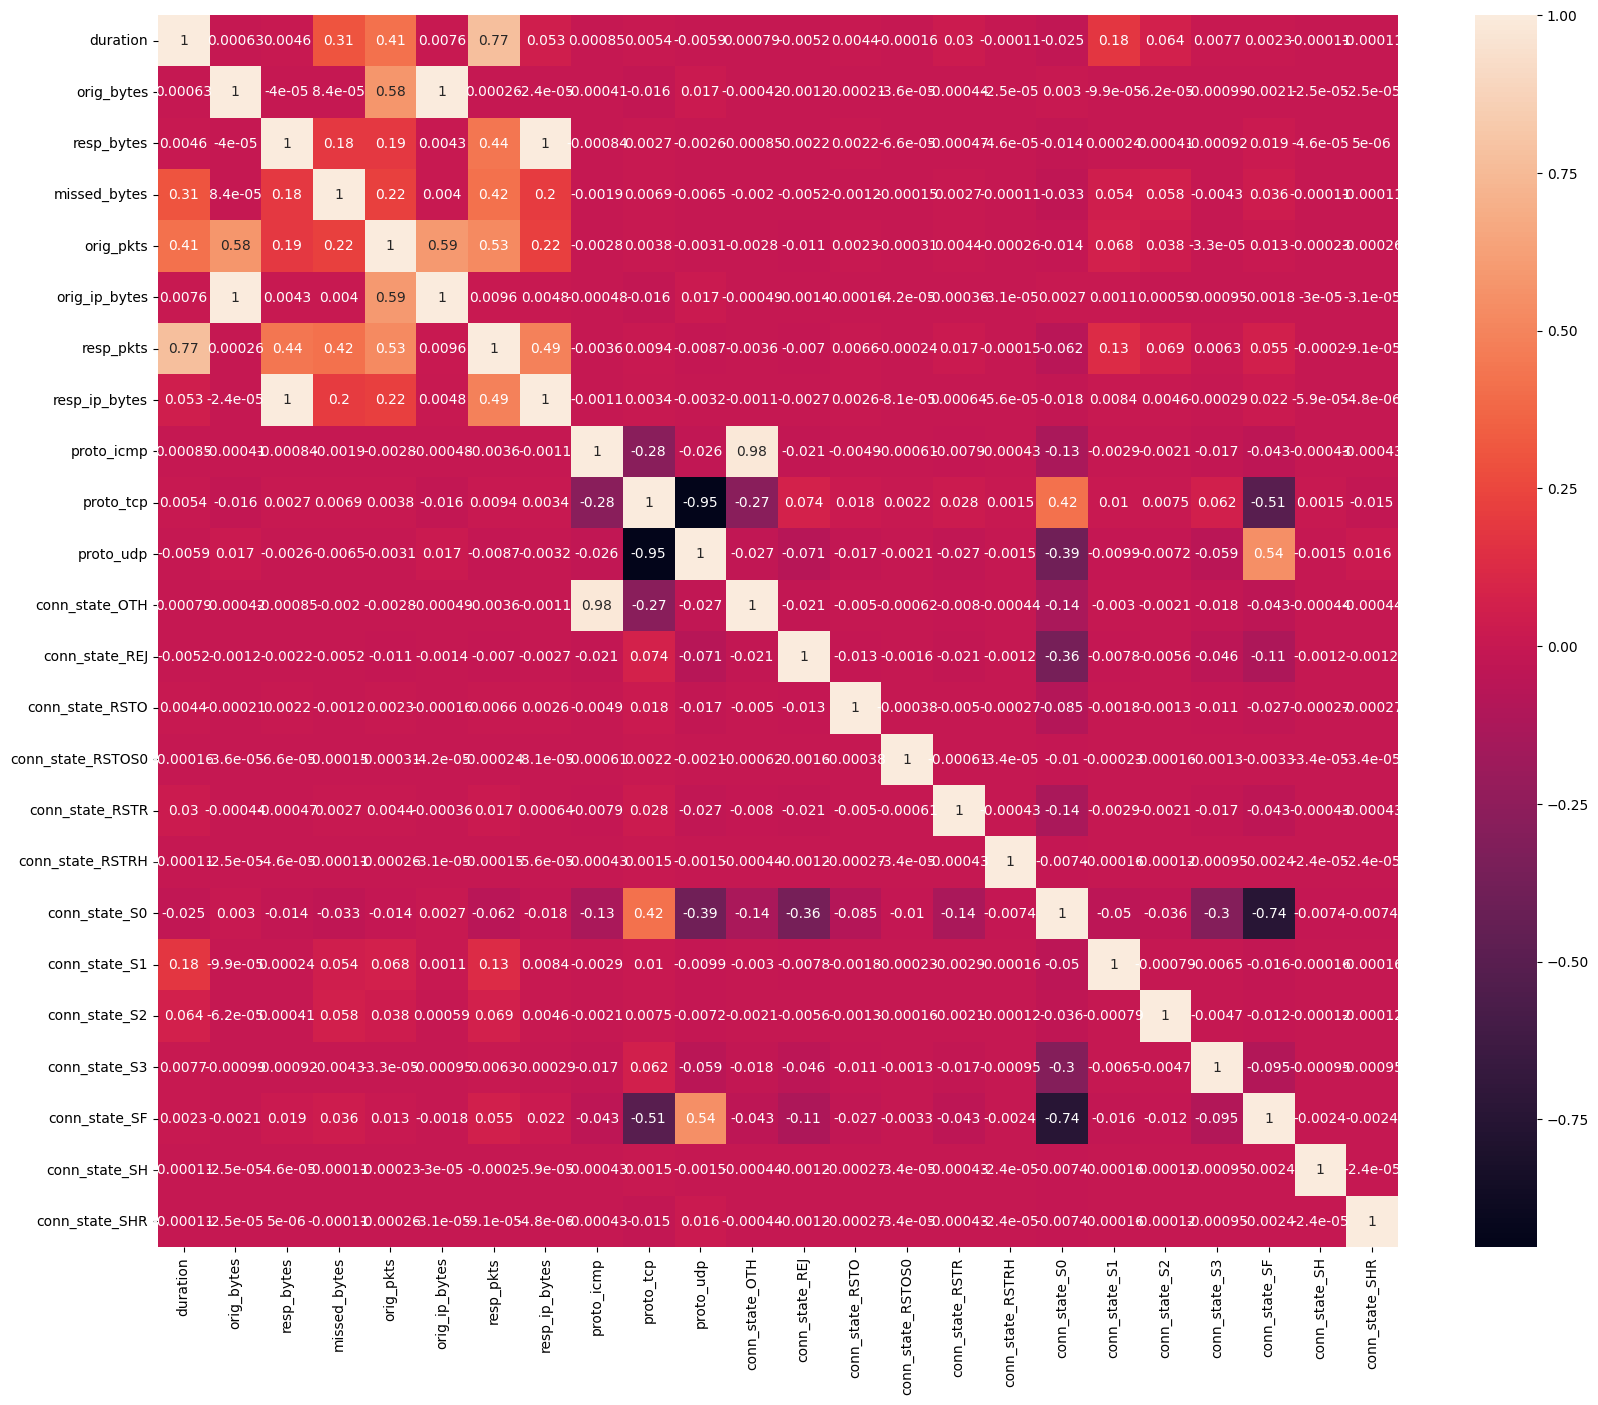

In [17]:
plt.figure(figsize = (20,16))
sns.heatmap(df.drop("label", axis = 1).corr(),annot=True)

Based on heatmap model we will 'remove conn_state_S0', 'conn_state_SF', 'proto_tcp' feature because these features will have proportional and inverse proportional with other features.

In [18]:
X = df[['duration', 'orig_bytes', 'resp_bytes', 'missed_bytes', 'orig_pkts', 'orig_ip_bytes', 'resp_pkts', 'resp_ip_bytes', 'proto_icmp', 'proto_udp', 'conn_state_OTH', 'conn_state_REJ', 'conn_state_RSTO', 'conn_state_RSTOS0', 'conn_state_RSTR', 'conn_state_RSTRH', 'conn_state_S1', 'conn_state_S2', 'conn_state_S3', 'conn_state_SH', 'conn_state_SHR']].values


In [19]:
from sklearn.model_selection import train_test_split

In [20]:
X.shape

(42213, 21)

In [21]:
Y = pd.get_dummies(df['label']).values

In [22]:
Y.shape

(42213, 9)

Applied MinMaxScaler to reduce the range of values of each features in data

In [23]:
scaler = MinMaxScaler()

In [24]:
scaler.fit(X)

MinMaxScaler()

In [25]:
normalized_x = scaler.transform(X)

In [26]:
normalized_x.shape

(42213, 21)

In [27]:
# Split data into independent and dependent variables
# data_X = df.drop("label", axis=1)
data_X = pd.DataFrame(normalized_x)
data_y = df["label"]

Split dataset into 2 parts:
- Training part: Use to train model
- Test part: Use to validation model and compare to find the best model

In [28]:
X_train, X_test, Y_train, Y_test = train_test_split(data_X, data_y, random_state=10, test_size=0.2)

## Train Models

### Naive Bayes

In [29]:
from sklearn.naive_bayes import GaussianNB

In [30]:
clf = GaussianNB()
clf.fit(X_train, Y_train)

GaussianNB()

In [31]:
start = time.time()
print('program start...')
print()

clf = GaussianNB().fit(X_train, Y_train)
print()

print('Accurancy Score:')
print(clf.score(X_test, Y_test))
print()

y_pred = clf.fit(X_train, Y_train).predict(X_test)
print(y_pred)
print()

end = time.time()
print('program end...')
print()
print('time cost: ')
print(end - start, 'seconds')

program start...


Accurancy Score:
0.21852422124837143

['C&C-HeartBeat' 'C&C-HeartBeat' 'C&C-HeartBeat' ... 'C&C-HeartBeat'
 'Benign' 'C&C-HeartBeat']

program end...

time cost: 
0.3264496326446533 seconds


In [32]:
print("Classifiction Report :")
print(classification_report(Y_test, y_pred))

Classifiction Report :
                           precision    recall  f1-score   support

                   Attack       0.80      0.99      0.89       729
                   Benign       1.00      0.18      0.30      4360
                      C&C       0.75      0.40      0.52       814
         C&C-FileDownload       0.50      1.00      0.67         2
            C&C-HeartBeat       0.00      1.00      0.00        10
                C&C-Torii       0.00      0.00      0.00         3
                     DDoS       0.45      0.83      0.59         6
                    Okiru       0.02      0.89      0.04         9
PartOfAHorizontalPortScan       0.08      0.00      0.00      2510

                 accuracy                           0.22      8443
                macro avg       0.40      0.59      0.33      8443
             weighted avg       0.68      0.22      0.28      8443



**RESULT TABLE**

|Naive Bayes   |         |         |        |       |
|--------------|---------|---------|--------|-------|
|Metrics       |Precision|Recall   |F1-score|Support|
|--------------|---------|---------|--------|-------|
| accuracy     |         |         | 0.22   | 8443  |
|macro avg     |  0.40   | 0.59    | 0.33   | 8443  |
|weighted avg  |  0.68   | 0.22    | 0.28   | 8443  |
|--------------|---------|---------|--------|-------|
|Time          |         |         |        |0.1392s|

### Decision Tree Classifier

In [33]:
from sklearn.tree import DecisionTreeClassifier

In [34]:
DT = DecisionTreeClassifier()

In [35]:
start = time.time()
print('program start...')
print()

DT.fit(data_X, data_y)
print()

print('prediction:')
y_pred = DT.predict(X_test)
print(y_pred)
print()

print('Accurancy Score:')
score = DT.score(X_test,Y_test)
print(score)

end = time.time()
print('program end...')
print()
print('time cost: ')
print(end - start, 'seconds')

program start...


prediction:
['Benign' 'Benign' 'PartOfAHorizontalPortScan' ...
 'PartOfAHorizontalPortScan' 'Benign' 'PartOfAHorizontalPortScan']

Accurancy Score:
0.9221840577993604
program end...

time cost: 
0.16208958625793457 seconds


In [36]:
print("Classifiction Report :")
print(classification_report(Y_test, y_pred))

Classifiction Report :
                           precision    recall  f1-score   support

                   Attack       1.00      1.00      1.00       729
                   Benign       0.88      0.99      0.93      4360
                      C&C       1.00      0.41      0.58       814
         C&C-FileDownload       1.00      1.00      1.00         2
            C&C-HeartBeat       0.00      0.00      0.00        10
                C&C-Torii       0.00      0.00      0.00         3
                     DDoS       0.86      1.00      0.92         6
                    Okiru       1.00      1.00      1.00         9
PartOfAHorizontalPortScan       0.98      0.96      0.97      2510

                 accuracy                           0.92      8443
                macro avg       0.75      0.71      0.71      8443
             weighted avg       0.93      0.92      0.91      8443



**RESULT TABLE**

|Decision Tree |         |         |        |       |
|--------------|---------|---------|--------|-------|
|Metrics       |Precision|Recall   |F1-score|Support|
|--------------|---------|---------|--------|-------|
| accuracy     |         |         | 0.92   | 8443  |
|macro avg     |  0.75   | 0.71    | 0.71   | 8443  |
|weighted avg  |  0.93   | 0.92    | 0.91   | 8443  |
|--------------|---------|---------|--------|-------|
|Time          |         |         |        |0.1025s|

### SVM Classifier

In [37]:
from sklearn.svm import SVC

In [38]:
SVM_classifier = SVC()

In [39]:
start = time.time()
print('program start...')
print()

SVM_classifier.fit(X_train, Y_train)
print()

print('Accurancy Score:')
print(SVM_classifier.score(X_test, Y_test))
print()

y_pred = SVM_classifier.predict(X_test)
print(y_pred)
print()

end = time.time()
print('program end...')
print()
print('time cost: ')
print(end - start, 'seconds')

program start...


Accurancy Score:
0.5596352007580244

['Benign' 'Benign' 'Benign' ... 'Benign' 'Benign' 'Benign']

program end...

time cost: 
187.91732835769653 seconds


In [40]:
print("Classifiction Report :")
print(classification_report(Y_test, y_pred))

Classifiction Report :
                           precision    recall  f1-score   support

                   Attack       0.00      0.00      0.00       729
                   Benign       0.54      1.00      0.70      4360
                      C&C       1.00      0.39      0.56       814
         C&C-FileDownload       0.00      0.00      0.00         2
            C&C-HeartBeat       0.00      0.00      0.00        10
                C&C-Torii       0.00      0.00      0.00         3
                     DDoS       0.00      0.00      0.00         6
                    Okiru       0.00      0.00      0.00         9
PartOfAHorizontalPortScan       0.72      0.02      0.04      2510

                 accuracy                           0.56      8443
                macro avg       0.25      0.16      0.14      8443
             weighted avg       0.59      0.56      0.43      8443



**RESULT TABLE**

|SVM Classifier|         |         |        |       |
|--------------|---------|---------|--------|-------|
|Metrics       |Precision|Recall   |F1-score|Support|
|--------------|---------|---------|--------|-------|
| accuracy     |         |         | 0.56   |  8443 |
|macro avg     |  0.25   | 0.16    | 0.14   | 8443  |
|weighted avg  |  0.59   | 0.56    | 0.43   | 8443  |
|--------------|---------|---------|--------|-------|
|Time          |         |         |        |124.56s|

### K-Nearest Neighbors

In [41]:
from sklearn.neighbors import KNeighborsClassifier

In [42]:
kneighbors_classifier = KNeighborsClassifier()

In [43]:
start = time.time()
print('program start...')
print()

kneighbors_classifier.fit(X_train, Y_train)
print()

print('Accurancy Score:')
print(kneighbors_classifier.score(X_test, Y_test))
print()

y_pred = kneighbors_classifier.predict(X_test)
print(y_pred)
print()

end = time.time()
print('program end...')
print()
print('time cost: ')
print(end - start, 'seconds')

program start...


Accurancy Score:
0.9058391566978562

['Benign' 'Benign' 'PartOfAHorizontalPortScan' ...
 'PartOfAHorizontalPortScan' 'Benign' 'PartOfAHorizontalPortScan']

program end...

time cost: 
1.8157188892364502 seconds


In [44]:
print("Classifiction Report :")
print(classification_report(Y_test, y_pred))

Classifiction Report :
                           precision    recall  f1-score   support

                   Attack       0.99      1.00      1.00       729
                   Benign       0.87      0.97      0.91      4360
                      C&C       0.86      0.41      0.55       814
         C&C-FileDownload       1.00      1.00      1.00         2
            C&C-HeartBeat       0.00      0.00      0.00        10
                C&C-Torii       0.00      0.00      0.00         3
                     DDoS       0.00      0.00      0.00         6
                    Okiru       1.00      0.22      0.36         9
PartOfAHorizontalPortScan       0.96      0.95      0.95      2510

                 accuracy                           0.91      8443
                macro avg       0.63      0.50      0.53      8443
             weighted avg       0.90      0.91      0.90      8443



**RESULT TABLE**

|K-Nearest Neighbors  |         |         |        |       |
|---------------------|---------|---------|--------|-------|
|Metrics              |Precision|Recall   |F1-score|Support|
|---------------------|---------|---------|--------|-------|
| accuracy            |         |         | 0.91   |  8443 |
|macro avg            |  0.63   | 0.50    | 0.53   | 8443  |
|weighted avg         |  0.90   | 0.91    | 0.90   | 8443  |
|---------------------|---------|---------|--------|-------|
|Time                 |         |         |        |10.824s|

### XGBoost

In [45]:
!pip install xgboost

Defaulting to user installation because normal site-packages is not writeable


In [46]:
import xgboost as xgb
from sklearn.preprocessing import LabelEncoder

In [47]:
le = LabelEncoder()
Y_train_transformed = le.fit_transform(Y_train)
Y_test_transformed = le.fit_transform(Y_test)

In [48]:
xgb_cls = xgb.XGBClassifier(objective = "binary:logistic", alpha = 10)

In [49]:
start = time.time()
print('program start...')
print()

xgb_cls.fit(X_train, Y_train_transformed)
print()

print('Accurancy Score:')
print(xgb_cls.score(X_test, Y_test_transformed))
print()

y_pred = xgb_cls.predict(X_test)
print(y_pred)
print()

end = time.time()
print('program end...')
print()
print('time cost: ')
print(end - start, 'seconds')

program start...


Accurancy Score:
0.9176832879308303

[1 1 8 ... 8 1 8]

program end...

time cost: 
1.267503261566162 seconds


In [50]:
print("Classifiction Report :")
print(classification_report(Y_test_transformed, y_pred))

Classifiction Report :
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       729
           1       0.88      0.98      0.93      4360
           2       1.00      0.40      0.57       814
           3       0.00      0.00      0.00         2
           4       0.00      0.00      0.00        10
           5       0.00      0.00      0.00         3
           6       0.00      0.00      0.00         6
           7       0.89      0.89      0.89         9
           8       0.97      0.96      0.96      2510

    accuracy                           0.92      8443
   macro avg       0.52      0.47      0.48      8443
weighted avg       0.92      0.92      0.91      8443



**RESULT TABLE**

|XGBOOST       |         |         |        |       |
|--------------|---------|---------|--------|-------|
|Metrics       |Precision|Recall   |F1-score|Support|
|--------------|---------|---------|--------|-------|
| accuracy     |         |         | 0.92   |  8443 |
|macro avg     |  0.52   | 0.47    | 0.48   | 8443  |
|weighted avg  |  0.92   | 0.92    | 0.91   | 8443  |
|--------------|---------|---------|--------|-------|
|Time          |         |         |        |0.742s |

### Convolutional neural network

In [51]:
scaler = MinMaxScaler()
scaler.fit(Y)
normalized_y = scaler.transform(Y)

In [52]:
X_train_cnn, X_test_cnn, Y_train_cnn, Y_test_cnn = train_test_split(normalized_x, normalized_y, random_state=10, test_size=0.2)

In [53]:
X_train.shape

(33770, 21)

In [54]:
model = Sequential()
model.add(Dense(2048, activation='relu',input_dim=21))
model.add(Dense(1024, activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(512,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(256,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(128,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(9, activation='softmax'))
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

In [55]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ dense (Dense)                        │ (None, 2048)                │          45,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 1024)                │       2,098,176 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 1024)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 512)                 │         524,800 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 512)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_3 (Dense)                      │ (None, 256)                 │         131,328 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_2 (Dropout)                  │ (None, 256)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_4 (Dense)                      │ (None, 128)                 │          32,896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_3 (Dropout)                  │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_5 (Dense)                      │ (None, 9)                   │           1,161 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,833,417 (10.81 MB)

 Trainable params: 2,833,417 (10.81 MB)

 Non-trainable params: 0 (0.00 B)

In [56]:
start = time.time()
print('program start...')
print()
callback = EarlyStopping(monitor='accuracy', patience=3)
history = model.fit(X_train_cnn, Y_train_cnn, epochs = 10,callbacks=[callback], batch_size=128, validation_data=(X_test_cnn,Y_test_cnn),verbose=1)

print()
end = time.time()
print('program end...')
print()
print('time cost: ')
print(end - start, 'seconds')

program start...

Epoch 1/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 29s 100ms/step - accuracy: 0.5270 - loss: 1.1644 - val_accuracy: 0.5595 - val_loss: 0.9920
Epoch 2/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 28s 107ms/step - accuracy: 0.5585 - loss: 0.9893 - val_accuracy: 0.6468 - val_loss: 0.7694
Epoch 3/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 29s 108ms/step - accuracy: 0.6516 - loss: 0.7634 - val_accuracy: 0.6437 - val_loss: 0.7694
Epoch 4/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 29s 108ms/step - accuracy: 0.6512 - loss: 0.7643 - val_accuracy: 0.6493 - val_loss: 0.7470
Epoch 5/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 31s 117ms/step - accuracy: 0.6259 - loss: 0.8417 - val_accuracy: 0.6553 - val_loss: 0.7375
Epoch 6/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 26s 97ms/step - accuracy: 0.6648 - loss: 0.7239 - val_accuracy: 0.6525 - val_loss: 0.7467
Epoch 7/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 31s 118ms/step - accuracy: 0.6634 - loss: 0.7236 - val_accuracy: 0.6560 - val_loss: 0.7257
Epoch 8/10
264/264 ━━━━━━━━━━━━━━━━━━━━ 37s 140ms/step - accuracy:

Text(0.5, 1.0, 'Train - Accuracy')

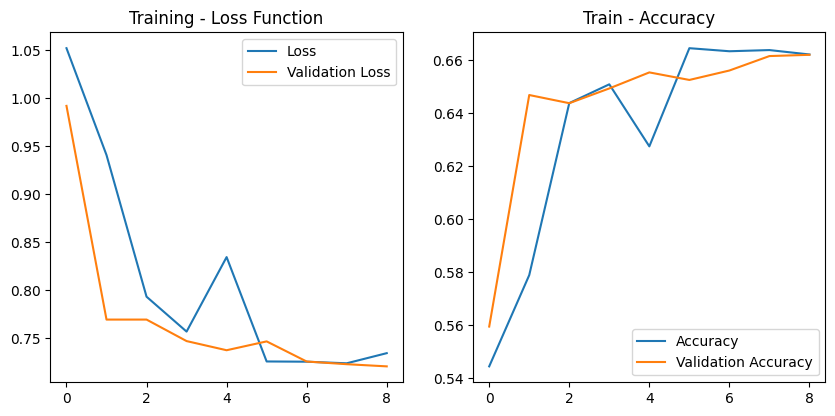

In [57]:
plt.figure(figsize=(10, 10))

plt.subplot(2, 2, 1)
plt.plot(history.history['loss'], label='Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.legend()
plt.title('Training - Loss Function')

plt.subplot(2, 2, 2)
plt.plot(history.history['accuracy'], label='Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.legend()
plt.title('Train - Accuracy')

|CNN           |        |         |      |       |
|--------------|--------|---------|------|-------|
| accuracy     |        |         |      |  0.66 |
|--------------|--------|---------|------|-------|
|Time          |        |         |      |75.970s|

## Conclusion

|Models                |Accurancy     |  Time       |
|----------------------|--------------|-------------|
|Naive Bayes           |22%           |0.1392s      |
|SVM Classifier        |56%           |124.56s      |
|K-Nearest Neighbors   |91%           |10.824s      |
|XGBOOST               |92%           |0.742s       |
|**Decision Tree**     |**92%**       |**0.1025s**  |
|CNN                   |66%           |75.970s      |